<a href="https://colab.research.google.com/github/shubhamarora03/Deep_Learning/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

We are going to use the **Oxford-IIIT Pet Dataset** (http://www.robots.ox.ac.uk/~vgg/data/pets/) **by O. M. Parkhi** et al., 2012 which features **12 cat breeds and 25 dogs breeds**. 
Our model will need to learn to differentiate between these 37 distinct categories. 

According to their paper, the best accuracy they could get in **2012** was **59.21%**, using a complex model that was specific to pet detection, 
with separate **"Image", "Head", and "Body"** models for the pet photos. 

Let's see how accurate we can be using **deep learning!**

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



For all the datasets there have been some constants defined for all of them. So in this URLs class, you can see where it's going to grab it from.

untar_data will download that to some convenient path and untar it for us and it will then return the value of path

In [4]:
path = untar_data(URLs.PETS); 
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_22.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_138.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_176.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_180.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_144.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In fastai, this is made really easy. There is an object called **ImageDataBunch**. An **ImageDataBunch** represents all of the data you need to build a model and there's some factory method which try to make it really easy for you to create that data bunch - a training set, a validation set with images and labels.

In this case, we need to extract the labels from the names. We are going to use **from_name_re**. 

re is the module in Python that does regular expressions - things that's really useful for extracting text.

With this factory method, we can basically say:

**path_img:** a path containing images

**fnames:** a list of file names

**pat:** a regular expression (i.e. pattern) to be used to extract the label from the file name

**ds_tfm:** we'll talk about transforms later

**size:** what size images do you want to work with.

**bs:** batch size (i.e. number of images processed at a time). Set to 16 if memory is not enough.

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,english_setter,Persian,Bengal,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,staffordshire_bull_terrier,Bengal,leonberger,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

**Normalization :-** Some channels might tend to be really bright, some might tend to be really not bright at all, some might vary a lot, and some might not very much at all. It really helps train a deep learning model if each one of those red green and blue channels has a mean of zero and a standard deviation of one.

If your data is not normalized, it can be quite difficult for your model to train well. So if you have trouble training a model, one thing to check is that you've normalized it.

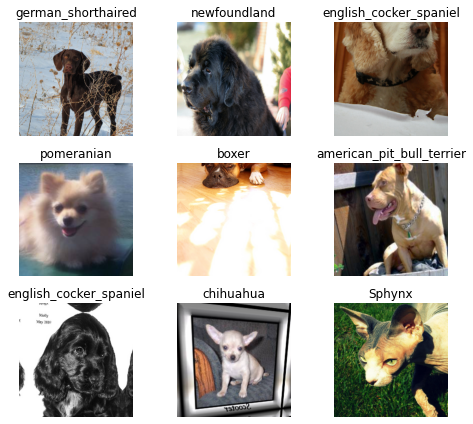

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)
data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

**Transfer Learning :-** How to take a model that already knows how to do something pretty well and make it so that it can do your thing really well. We will take a pre-trained model, and then we fit it so that instead of predicting a thousand categories of ImageNet with ImageNet data, it predicts the **37** **categories** of pets using your pet data. 

By doing this, you can train models in 1/100 or less of the time of regular model training with 1/100 or less of the data of regular model training.

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.403286,0.308417,0.094046,01:19
1,0.622942,0.291242,0.087957,01:20
2,0.404128,0.246395,0.074425,01:20
3,0.284005,0.233641,0.069689,01:20


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
doc(interp.plot_top_losses)

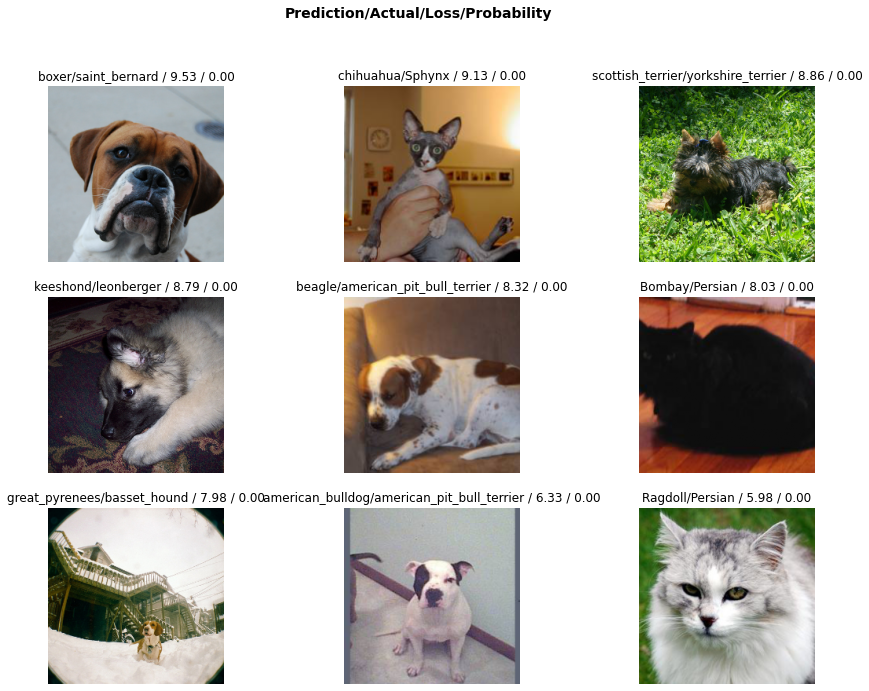

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

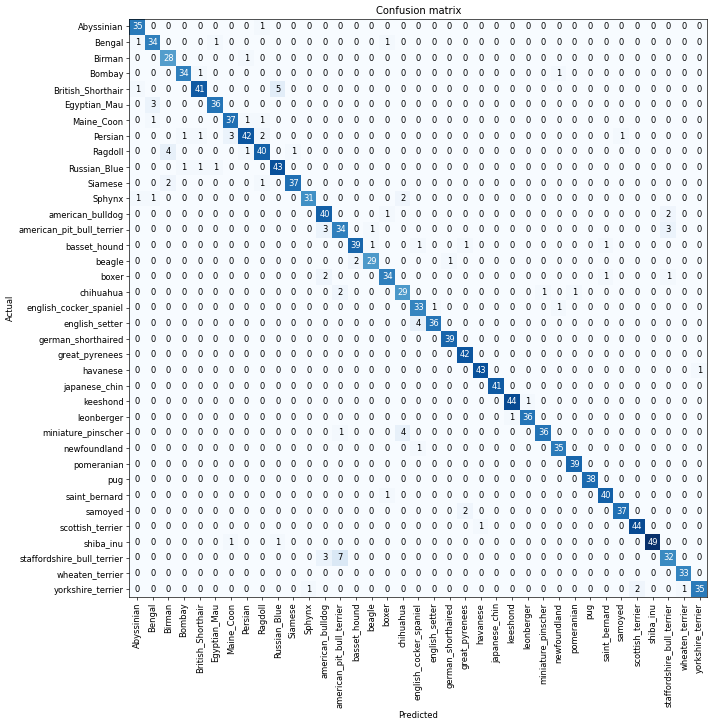

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Ragdoll', 'Birman', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Maine_Coon', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Persian', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

But what we really want to do is to go back and train the whole model. This is why we pretty much always use this two stage process. By default, when we call fit or fit_one_cycle on a ConvLearner, it'll just fine-tune these few extra layers added to the end and it will run very fast. It will basically never overfit but to really get it good, you have to call **unfreeze**. 

**unfreeze** is the thing that says please train the whole model. Then I can call fit_one_cycle again.

In [22]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.664405,0.376820,0.104871,01:20


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


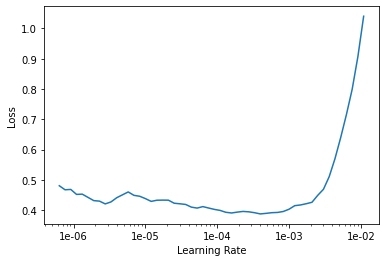

In [23]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.119518,0.254851,0.071042,01:19
1,0.098774,0.234416,0.066982,01:20
